In [47]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
import matplotlib.pyplot as plt
%run Karate_data_import.ipynb
import sys
sys.path.append('../') 
from Functions import *
%store -r points

In [48]:
# Adding stopping criteria
alpha = 2
prev_grad = 200 
grad = 0
k = 0
n = 10000000
MLL = np.zeros(n) # Define the MLL
grad_sum = np.zeros(n) # Define the gradient sum

while abs(prev_grad - grad) > 0.0001: # stopping criteria
    prev_grad = grad
    for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_prior_fast(i,dim,Y,points,alpha)
            grad_sum[k] += np.sum((grad_now)**2)
            points[i] += LR(k*10)*grad_now # Use Gradient_function and take step=0.1*grad
    grad = grad_sum[k]
    MLL[k] = Loss_function_prior_fast(points,Y,2,alpha) # Calcualte the probability using Loss_function
    k += 1

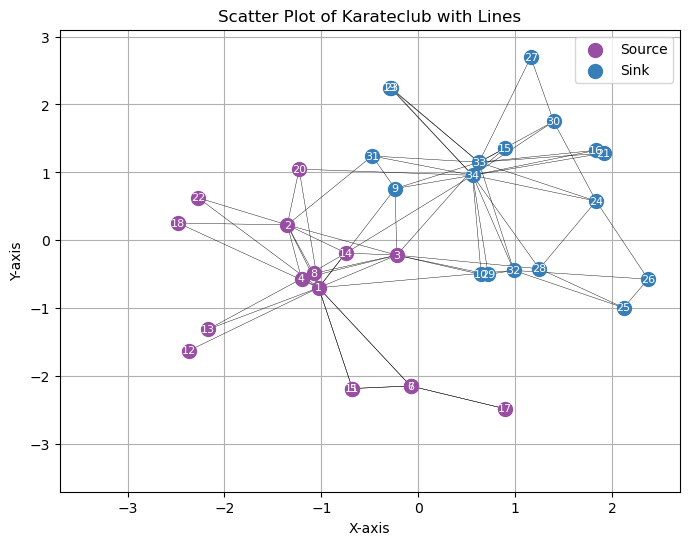

In [66]:
source = np.array([1,2,3,4,5,6,7,8,11,12,13,14,17,18,20,22])
sink = np.array([9,10,15,16,19,21,23,24,25,26,27,28,29,30,31,32,33,34])

# Generating some sample data for points
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.3) # Ad a line between Y[m][1] and Y[m][2]

# Extract the points and plot them, coloring based on source and sink
x_source = [points[i][0] for i in source]
y_source = [points[i][1] for i in source]
plt.scatter(x_source, y_source, color='#984ea3', label='Source', s = 100, zorder=2)

x_sink = [points[i][0] for i in sink]
y_sink = [points[i][1] for i in sink]
plt.scatter(x_sink, y_sink, color='#377eb8', label='Sink', s = 100, zorder=2)

# Add point numbers inside vertices
for i, point in points.items():
    plt.text(point[0], point[1], str(i), color='white', fontsize=8, ha='center', va='center')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(-3.7,  2.7)
plt.ylim(-3.7,  3.1)
plt.title('Scatter Plot of Karateclub with Lines')
plt.grid(True)
plt.legend()
plt.show()


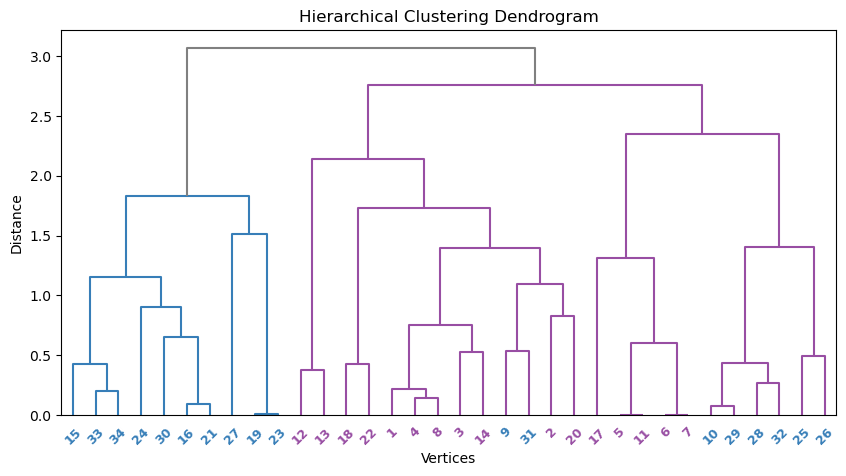

In [64]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import set_link_color_palette

source = np.array([1,2,3,4,5,6,7,8,11,12,13,14,17,18,20,22])
sink = np.array([9,10,15,16,19,21,23,24,25,26,27,28,29,30,31,32,33,34])

# Calculate pairwise distances
distances = pdist(list(points.values()))

# Perform hierarchical clustering
Z = linkage(distances, method='average')

# Set custom color palette
set_link_color_palette(['#377eb8', '#984ea3', '#4daf4a', '#e41a1c'])

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendro = dendrogram(Z, labels=list(points.keys()), above_threshold_color='grey', color_threshold=2.8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Vertices')
plt.ylabel('Distance')

# Customize tick labels on the x-axis
plt.xticks(fontsize=9, fontweight='bold')

# Get the tick labels
ax = plt.gca()
xticks = ax.get_xmajorticklabels()

# Color the tick labels
for label in xticks:
    point_number = int(label.get_text())
    if point_number in source:
        label.set_color('#984ea3')  # Color for source
    elif point_number in sink:
        label.set_color('#377eb8')  # Color for sink

plt.show()